In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## checking missing values 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## delete the rows or data point to handle missing values
df.shape

(891, 15)

In [6]:
df.dropna().shape  # bad - we are lossing so much of data 

(182, 15)

In [7]:
## column wise 
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation missing values
### 1. mean value imputation

<Axes: xlabel='age', ylabel='Count'>

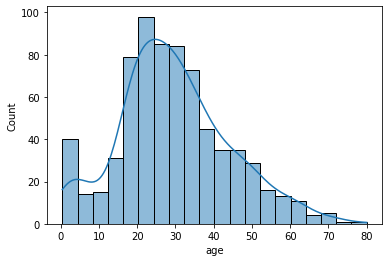

In [8]:
sns.histplot(df['age'], kde=True)

In [9]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [10]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [11]:
## MEAN IMPUTATION WORKS WELL WHEN WE HAVE NORMALLY DISTRIBUTED DATA

### 2. MEDIAN VALUE IMPUTATION

#### IF WE HAVE OUTLIERS IN DATA

In [12]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [13]:
df[['age_median', 'age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3. mode imputation technquies -  categarica values

In [14]:
df[df['embarked'].isnull()]  # misiing data completely at random

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()
# else
# df['embarked'][df['embarked'].notna()].mode()

In [17]:
df['embarked_mode']=df['embarked'].fillna('mode_value')

In [18]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [19]:
df['embarked_mode'].isnull().sum()

0

In [20]:
nan_indices = df[df['embarked'].isnull()].index

In [21]:
nan_indices

Index([61, 829], dtype='int64')

In [22]:
random_samples = np.random.choice(df['embarked'].dropna(), size=len(nan_indices), replace=True)

In [23]:
df['embarked_random'] = df['embarked'].copy()

In [24]:
# df['embarked_random'].loc[nan_indices] = random_samples

In [25]:
df.loc[nan_indices, 'embarked_random'] = random_samples

In [26]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode,embarked_random
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,C,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,S,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,S,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,S,S
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,S,S
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S,S
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,C,C


In [27]:
df['embarked_random'].isnull().sum()

0

In [28]:
df['embarked'][df['embarked'].isnull()].index

Index([61, 829], dtype='int64')

### handling imbalnce datapoints

#### 1. Up sampling
#### 2. Down sampling

#### Up sampling

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

# ste the random seed for reproducibility
np.random.seed(123)
#create a dataframe with two classes
n_samples =1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [30]:
n_class_0, n_class_1

(900, 100)

In [31]:
## create my dataframe with imbalance dataset

In [32]:
class_0 = pd.DataFrame({'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),'target': [0] * n_class_0})
print(class_0)
print(type(class_0))

     feature_1  feature_2  target
0    -1.085631   0.551302       0
1     0.997345   0.419589       0
2     0.282978   1.815652       0
3    -1.506295  -0.252750       0
4    -0.578600  -0.292004       0
..         ...        ...     ...
895   0.238761  -0.003155       0
896  -1.106386  -0.430660       0
897   0.366732  -0.146416       0
898   1.023906   1.160176       0
899  -0.210056  -0.641512       0

[900 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='feature_1', ylabel='Count'>

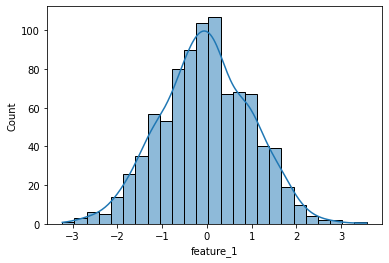

In [33]:
sns.histplot(class_0['feature_1'],kde=True)


<Axes: xlabel='feature_2', ylabel='Count'>

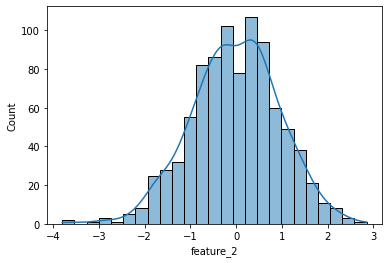

In [34]:
sns.histplot(class_0['feature_2'],kde=True)

In [35]:
class_1 = pd.DataFrame({'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),'target': [1] * n_class_1})
print(class_1)
print(type(class_1))

    feature_1  feature_2  target
0    1.699768   2.139033       1
1    1.367739   2.025577       1
2    1.795683   1.803557       1
3    2.213696   3.312255       1
4    3.033878   3.187417       1
..        ...        ...     ...
95   1.376371   2.845701       1
96   2.239810   0.880077       1
97   1.131760   1.640703       1
98   2.902006   0.390305       1
99   2.697490   2.013570       1

[100 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='feature_1', ylabel='Count'>

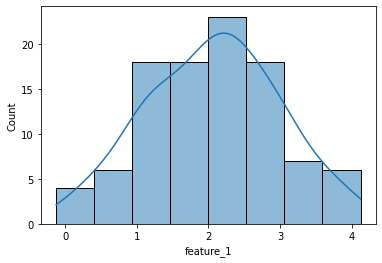

In [36]:
sns.histplot(class_1['feature_1'],kde=True)

<Axes: xlabel='feature_2', ylabel='Count'>

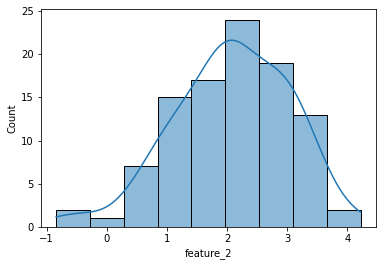

In [37]:
sns.histplot(class_1['feature_2'],kde=True)

In [38]:
dff = pd.concat([class_0, class_1]).reset_index(drop=True)

In [39]:
dff.head(5)

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [40]:
dff.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [41]:
dff['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [42]:
## up sampling

In [43]:
dff_minority=dff[dff['target'] == 1]
dff_majority=dff[dff['target'] == 0]

In [50]:
len(dff_minority)

100

In [51]:
len(dff_majority)

900

In [44]:
from sklearn.utils import resample
df_minority_upsample = resample(dff_minority, replace=True, # sample with replacement
                               n_samples=len(dff_majority),
                                random_state=42                               
                               )

In [49]:
len(df_minority_upsample )                                

900

In [55]:
df_upsample = pd.concat([dff_majority, df_minority_upsample])

In [56]:
df_upsample.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [57]:
len(df_upsample)

1800

In [58]:
df_upsample['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

#### Down sampling

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

# ste the random seed for reproducibility
np.random.seed(123)
#create a dataframe with two classes
n_samples =1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})


dff = pd.concat([class_0, class_1]).reset_index(drop=True)

dff_minority=dff[dff['target'] == 1]
dff_majority=dff[dff['target'] == 0]


In [61]:
from sklearn.utils import resample
df_majority_downsample = resample(dff_majority, replace=False, # False because we need to reduce data point
                               n_samples=len(dff_minority),
                                random_state=42                               
                               )

In [62]:
df_majority_downsample.shape

(100, 3)

In [63]:
df_downsample = pd.concat([dff_minority, df_majority_downsample])

In [64]:
df_downsample.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [65]:
len(df_downsample)

200

In [67]:
df_downsample['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64